In [1]:
from nptdms import TdmsFile as TF
import numpy as np
import pandas as pd
import datetime
import matplotlib as mplt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = TF('C:\\Users\\bowenm\\Documents\\jet cfd results.tdms')

In [3]:
df = file.object('exhaust_data_Case9').as_dataframe()

In [4]:
x = np.tile(np.linspace(0,204.5,410), 100)
y = np.sort(np.tile(np.linspace(0, 49.5, 100), 410))

In [5]:
index = list(zip(*(x,y)))
index

[(0.0, 0.0),
 (0.5, 0.0),
 (1.0, 0.0),
 (1.5, 0.0),
 (2.0, 0.0),
 (2.5, 0.0),
 (3.0, 0.0),
 (3.5, 0.0),
 (4.0, 0.0),
 (4.5, 0.0),
 (5.0, 0.0),
 (5.5, 0.0),
 (6.0, 0.0),
 (6.5, 0.0),
 (7.0, 0.0),
 (7.5, 0.0),
 (8.0, 0.0),
 (8.5, 0.0),
 (9.0, 0.0),
 (9.5, 0.0),
 (10.0, 0.0),
 (10.5, 0.0),
 (11.0, 0.0),
 (11.5, 0.0),
 (12.0, 0.0),
 (12.5, 0.0),
 (13.0, 0.0),
 (13.5, 0.0),
 (14.0, 0.0),
 (14.5, 0.0),
 (15.0, 0.0),
 (15.5, 0.0),
 (16.0, 0.0),
 (16.5, 0.0),
 (17.0, 0.0),
 (17.5, 0.0),
 (18.0, 0.0),
 (18.5, 0.0),
 (19.0, 0.0),
 (19.5, 0.0),
 (20.0, 0.0),
 (20.5, 0.0),
 (21.0, 0.0),
 (21.5, 0.0),
 (22.0, 0.0),
 (22.5, 0.0),
 (23.0, 0.0),
 (23.5, 0.0),
 (24.0, 0.0),
 (24.5, 0.0),
 (25.0, 0.0),
 (25.5, 0.0),
 (26.0, 0.0),
 (26.5, 0.0),
 (27.0, 0.0),
 (27.5, 0.0),
 (28.0, 0.0),
 (28.5, 0.0),
 (29.0, 0.0),
 (29.5, 0.0),
 (30.0, 0.0),
 (30.5, 0.0),
 (31.0, 0.0),
 (31.5, 0.0),
 (32.0, 0.0),
 (32.5, 0.0),
 (33.0, 0.0),
 (33.5, 0.0),
 (34.0, 0.0),
 (34.5, 0.0),
 (35.0, 0.0),
 (35.5, 0.0),
 (36.0, 0.0)

In [6]:
df.index = pd.MultiIndex.from_tuples(index, names = ['x','y'])

In [7]:
df = df['temperature(K)']
df = df.sort_index()

In [8]:
levels = list(range(0,3300,20))

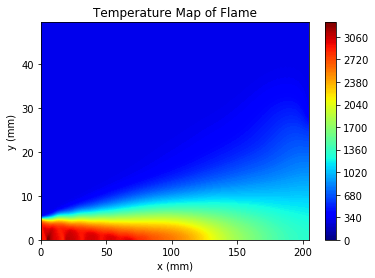

In [9]:
plt.contourf(df.index.levels[0], df.index.levels[1], df.unstack('x'), levels = levels, cmap='jet')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Temperature Map of Flame')
plt.colorbar()

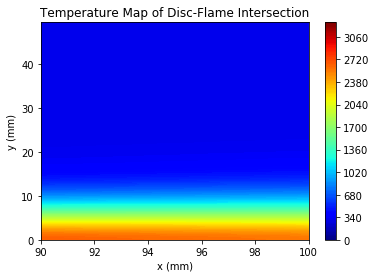

In [16]:
subdf = df.loc[slice(90,100),:].unstack('x')
plt.contourf(subdf.columns,subdf.index,subdf, cmap = 'jet', levels = levels)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Temperature Map of Disc-Flame Intersection')
plt.colorbar()

Text(0.5,1,' X-Averaged Temperature (9cm<y<10cm)')

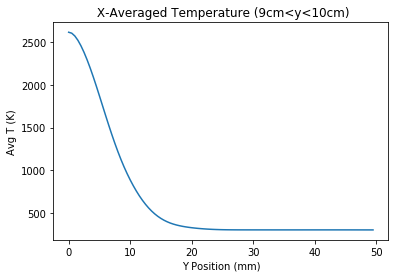

In [17]:
plt.plot(subdf.index, subdf.mean(axis=1))
plt.xlabel('Y Position (mm)')
plt.ylabel('Avg T (K)')
plt.title(' X-Averaged Temperature (9cm<y<10cm)')

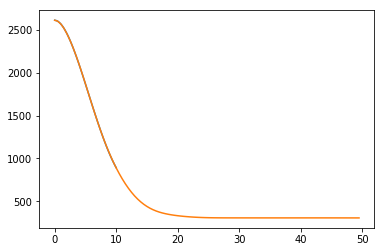

In [18]:
plt.plot(np.linspace(0,10,101), np.polyval(np.polyfit(subdf.index[0:21],subdf.mean(axis=1)[slice(0,10)], 4), np.linspace(0,10,101)))
plt.plot(subdf.index, subdf.mean(axis=1))

In [19]:
arr = np.polyval(np.polyfit(subdf.index[0:41],subdf.mean(axis=1)[slice(0,20)], 4), np.linspace(0,20,1001))
np.linspace(0,20,1001)[np.where(np.around(arr, 0)==774)]

array([ 10.82])

In [22]:
np.polyval(np.polyfit(subdf.index[0:41],subdf.mean(axis=1)[slice(0,20)], 4),10.82)

774.02861858672327

Text(0.5,1,' X-Averaged Temperature (9cm<x<10cm)')

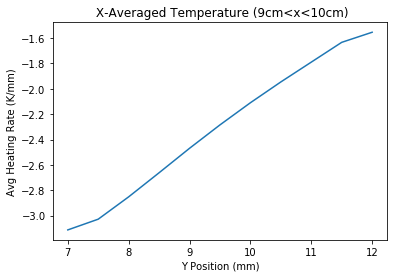

In [26]:
plt.plot(subdf.index[14:25], np.gradient(subdf.mean(axis=1)[slice(7,12)], subdf.index[14:25])*.015)
plt.xlabel('Y Position (mm)')
plt.ylabel('Avg Heating Rate (K/mm)')
plt.title(' X-Averaged Temperature (9cm<x<10cm)')

In [27]:
print(len(subdf.mean(axis=1)[slice(10,20)]), len(subdf.index[20:41]))

21 21


Text(0.5,1,' X-Averaged Temperature (9cm<y<10cm)')

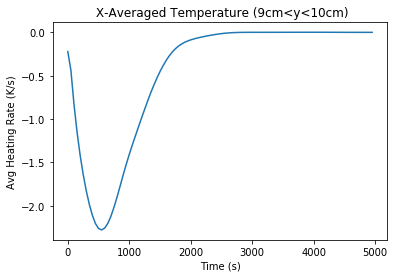

In [28]:
plt.plot(subdf.index*100, np.gradient(subdf.mean(axis=1), subdf.index)*.01)
plt.xlabel('Time (s)')
plt.ylabel('Avg Heating Rate (K/s)')
plt.title(' X-Averaged Temperature (9cm<y<10cm)')

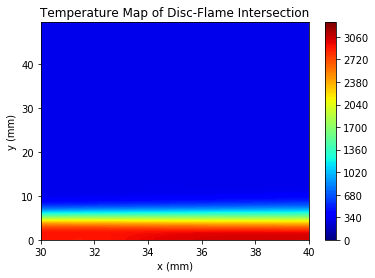

In [305]:
subdf = df.loc[:,slice(30,40)].unstack('x')
plt.contourf(subdf.columns,subdf.index,subdf, cmap = 'jet', levels = levels)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.title('Temperature Map of Disc-Flame Intersection')
plt.colorbar()

Text(0.5,1,' X-Averaged Temperature (9cm<y<10cm)')

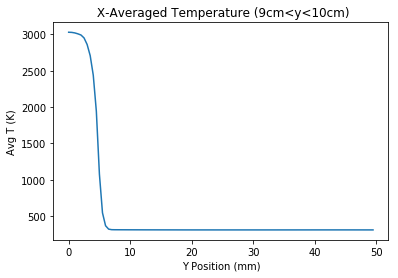

In [181]:
plt.plot(subdf.index, subdf.mean(axis=1))
plt.xlabel('Y Position (mm)')
plt.ylabel('Avg T (K)')
plt.title(' X-Averaged Temperature (9cm<y<10cm)')

1077.6477142857143

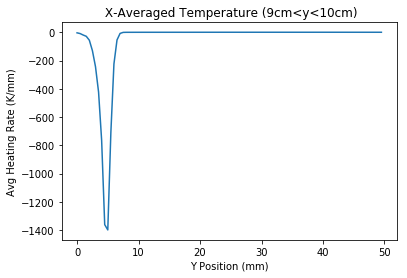

In [193]:
plt.plot(subdf.index, np.gradient(subdf.mean(axis=1), subdf.index))
plt.xlabel('Y Position (mm)')
plt.ylabel('Avg Heating Rate (K/mm)')
plt.title(' X-Averaged Temperature (9cm<y<10cm)')
np.where(np.gradient(subdf.mean(axis=1), subdf.index) == min(np.gradient(subdf.mean(axis=1), subdf.index)))
subdf.mean(axis=1).iloc[10]

Text(0.5,1,' X-Averaged Temperature (9cm<y<10cm)')

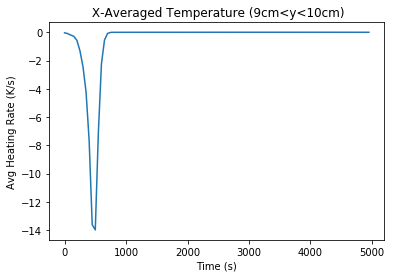

In [137]:
plt.plot(subdf.index*100, np.gradient(subdf.mean(axis=1), subdf.index)*.01)
plt.xlabel('Time (s)')
plt.ylabel('Avg Heating Rate (K/s)')
plt.title(' X-Averaged Temperature (9cm<y<10cm)')

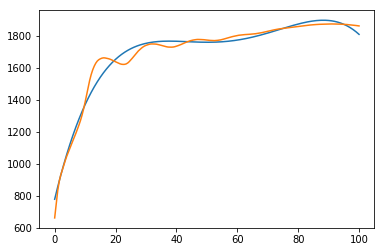

In [176]:
subdf = df.loc[5,slice(0,100)].unstack('y')
plt.plot(subdf.index, np.polyval(np.polyfit(subdf.index, subdf.values[:,0], 4),subdf.index))
plt.plot(subdf)


In [273]:
[1,2,4,5,1,4,5,3,2,23,235,1,35][[0,3,4]]

TypeError: list indices must be integers or slices, not list